<center><h1 style="color:#000080; font-size:50px">Cat and Dog Image Classifier</h1></center>

<p><b>Import necessary libraries</p>

In [4]:
import os
import random
import tensorflow as tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

<p><b>Import Data</p>

In [5]:
seed = 42
random.seed(seed)
tf.random.set_seed(seed)

<p><b>Data Preprocessing </p>

In [6]:
train_dir = r"C:\Users\dog-cat\train"
validation_dir = r"C:\Users\dog-cat\train"

In [7]:
img_width, img_height = 150, 150
batch_size = 32

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [9]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.


<p><b>Model Implementation</p>

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


17/17 [==============================] - 19s 1s/step - loss: 0.7282 - accuracy: 0.5162 - val_loss: 0.6813 - val_accuracy: 0.5790
Epoch 2/10
17/17 [==============================] - 19s 1s/step - loss: 0.6757 - accuracy: 0.6103 - val_loss: 0.6601 - val_accuracy: 0.5441
Epoch 3/10
17/17 [==============================] - 19s 1s/step - loss: 0.6477 - accuracy: 0.6248 - val_loss: 0.6040 - val_accuracy: 0.6820
Epoch 4/10
17/17 [==============================] - 16s 962ms/step - loss: 0.6342 - accuracy: 0.6476 - val_loss: 0.5970 - val_accuracy: 0.6893
Epoch 5/10
17/17 [==============================] - 15s 916ms/step - loss: 0.6469 - accuracy: 0.6210 - val_loss: 0.6139 - val_accuracy: 0.6232
Epoch 6/10
17/17 [==============================] - 16s 954ms/step - loss: 0.6069 - accuracy: 0.6781 - val_loss: 0.5634 - val_accuracy: 0.6949
Epoch 7/10
17/17 [==============================] - 17s 1s/step - loss: 0.5593 - accuracy: 0.7200 - val_loss: 0.5689 - val_accuracy: 0.6967
Epoch 8/1

In [15]:
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Test Accuracy: {test_acc}")

17/17 [==============================] - 6s 328ms/step - loss: 0.4990 - accuracy: 0.7537
Test Accuracy: 0.7536764740943909


<p><b>Training History<p>

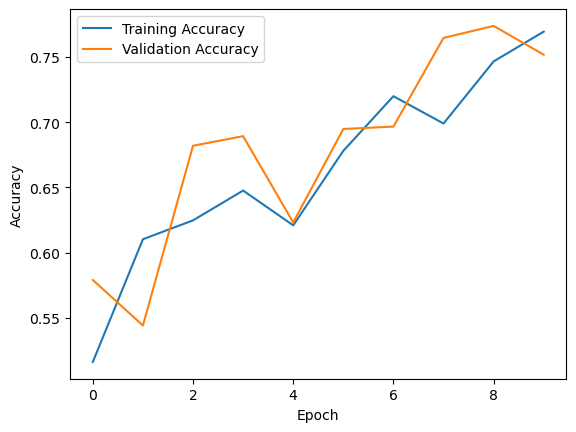

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

1/1 [==============================] - 0s 97ms/step


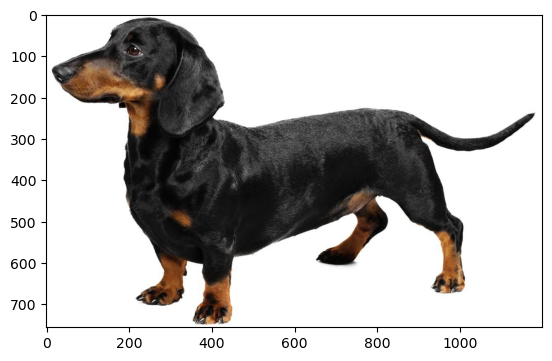

It's a dog!


In [18]:
from PIL import Image
import matplotlib.pyplot as plt
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.show()
# Example usage
image_path = r"C:\Users\dog-cat\train\dogs\dog_92.jpg"
input_image = preprocess_image(image_path)
prediction = model.predict(input_image)
display_image(image_path)
if prediction >= 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")